In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv("cancer patient data sets.csv")
ds

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
ds.shape

(1000, 26)

In [4]:
ds.duplicated().sum()

0

In [5]:
# ds.drop_duplicates(inplace = True)
# ds.duplicated().sum()

In [6]:
ds.shape

(1000, 26)

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [8]:
ds.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [9]:
ds.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
ds['Gender']=le.fit_transform(ds['Gender'])
ds['Air Pollution']=le.fit_transform(ds['Air Pollution'])
ds['Alcohol use']=le.fit_transform(ds['Alcohol use'])
ds['Dust Allergy']=le.fit_transform(ds['Dust Allergy'])
ds['OccuPational Hazards']=le.fit_transform(ds['OccuPational Hazards'])
ds['Genetic Risk']=le.fit_transform(ds['Genetic Risk'])
ds['chronic Lung Disease']=le.fit_transform(ds['chronic Lung Disease'])
ds['Balanced Diet']=le.fit_transform(ds['Balanced Diet'])
ds['Obesity']=le.fit_transform(ds['Obesity'])
ds['Smoking']=le.fit_transform(ds['Smoking'])
ds['Passive Smoker']=le.fit_transform(ds['Passive Smoker'])
ds['Chest Pain']=le.fit_transform(ds['Chest Pain'])
ds['Coughing of Blood']=le.fit_transform(ds['Coughing of Blood'])
ds['Fatigue']=le.fit_transform(ds['Fatigue'])
ds['Weight Loss']=le.fit_transform(ds['Weight Loss'])
ds['Shortness of Breath']=le.fit_transform(ds['Shortness of Breath'])
ds['Wheezing']=le.fit_transform(ds['Wheezing'])
ds['Swallowing Difficulty']=le.fit_transform(ds['Swallowing Difficulty'])
ds['Clubbing of Finger Nails']=le.fit_transform(ds['Clubbing of Finger Nails'])
ds['Frequent Cold']=le.fit_transform(ds['Frequent Cold'])
ds['Dry Cough']=le.fit_transform(ds['Dry Cough'])
ds['Snoring']=le.fit_transform(ds['Snoring'])
ds['Level']=le.fit_transform(ds['Level'])

In [11]:
ds

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,0,1,3,4,3,2,1,...,2,3,1,1,2,0,1,2,3,1
1,1,P10,17,0,2,0,4,2,3,1,...,0,2,6,7,5,1,0,6,1,2
2,2,P100,35,0,3,4,5,4,4,3,...,6,6,7,1,0,3,5,6,1,0
3,3,P1000,37,0,6,6,6,6,5,6,...,3,1,2,0,3,4,5,6,4,0
4,4,P101,46,0,5,7,6,6,6,5,...,2,1,3,0,3,1,3,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,0,5,6,6,6,6,5,...,4,2,1,6,7,1,3,4,2,0
996,996,P996,37,1,5,7,6,6,6,5,...,7,5,4,6,1,3,2,0,3,0
997,997,P997,25,1,3,4,5,4,4,3,...,6,6,7,1,0,3,5,6,1,0
998,998,P998,18,1,5,7,6,6,6,5,...,2,1,3,0,3,1,3,1,2,0


In [12]:
ds.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [13]:
ds=ds.drop(['index', 'Patient Id',],axis=1)

In [14]:
ds

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,0,1,3,4,3,2,1,1,3,...,2,3,1,1,2,0,1,2,3,1
1,17,0,2,0,4,2,3,1,1,1,...,0,2,6,7,5,1,0,6,1,2
2,35,0,3,4,5,4,4,3,5,6,...,6,6,7,1,0,3,5,6,1,0
3,37,0,6,6,6,6,5,6,6,6,...,3,1,2,0,3,4,5,6,4,0
4,46,0,5,7,6,6,6,5,6,6,...,2,1,3,0,3,1,3,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,0,5,6,6,6,6,5,6,6,...,4,2,1,6,7,1,3,4,2,0
996,37,1,5,7,6,6,6,5,6,6,...,7,5,4,6,1,3,2,0,3,0
997,25,1,3,4,5,4,4,3,5,6,...,6,6,7,1,0,3,5,6,1,0
998,18,1,5,7,6,6,6,5,6,6,...,2,1,3,0,3,1,3,1,2,0


In [15]:
ds.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_features = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']
ds[numerical_features] = scaler.fit_transform(ds[numerical_features])

In [17]:
ds.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.360608,0.065746,-1.010111,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655,0.039558
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-1.379277,-0.387677,1.317334,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245,1.238293
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.676728,1.426018,1.782823,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,-1.159177
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,0.148726,-0.841101,-0.544622,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105,-1.159177
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,-0.360608,-0.841101,-0.079133,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,-1.159177


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ds['Level'] = label_encoder.fit_transform(ds['Level'])

In [19]:
ds

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.360608,0.065746,-1.010111,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655,1
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-1.379277,-0.387677,1.317334,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245,2
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.676728,1.426018,1.782823,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,0
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,0.148726,-0.841101,-0.544622,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105,0
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,-0.360608,-0.841101,-0.079133,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.568858,-0.819903,1.064362,0.930449,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,0.658060,-0.387677,-1.010111,1.579206,1.874630,-0.805663,0.253332,0.562810,0.050205,0
996,-0.014501,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,2.186062,0.972594,0.386356,1.579206,-0.769418,0.032260,-0.292643,-1.399911,0.728655,0
997,-1.014543,1.219657,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.676728,1.426018,1.782823,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,0
998,-1.597901,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,-0.360608,-0.841101,-0.079133,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,0


In [20]:
from sklearn.ensemble import RandomForestClassifier

x = ds[numerical_features]
y = ds['Level']

rf = RandomForestClassifier(random_state=42)
rf.fit(x,y)

feature_importances = rf.feature_importances_

feature_importance_ds = pd.DataFrame({'Feature': numerical_features, 'Importance': feature_importances})

feature_importance_ds = feature_importance_ds.sort_values(by='Importance', ascending=False)

print(feature_importance_ds)

                     Feature  Importance
23                     Level    0.241377
13         Coughing of Blood    0.091854
9                    Obesity    0.086441
11            Passive Smoker    0.077316
17                  Wheezing    0.076835
16       Shortness of Breath    0.036862
8              Balanced Diet    0.033921
2              Air Pollution    0.033657
3                Alcohol use    0.030302
12                Chest Pain    0.029837
4               Dust Allergy    0.029645
18     Swallowing Difficulty    0.029359
14                   Fatigue    0.028360
6               Genetic Risk    0.027534
10                   Smoking    0.024105
22                   Snoring    0.023060
19  Clubbing of Finger Nails    0.020082
5       OccuPational Hazards    0.018274
7       chronic Lung Disease    0.017646
20             Frequent Cold    0.017188
21                 Dry Cough    0.013443
15               Weight Loss    0.010795
0                        Age    0.002105
1               

In [21]:
important_features = [
    "Smoking",
    "Swallowing Difficulty",
    "Dust Allergy",
    "Chest Pain",
    "Alcohol use",
    "Air Pollution",
    "Balanced Diet",
    "Shortness of Breath",
    "Passive Smoker",
    "Coughing of Blood",
    "Level"
]

In [22]:
imp_data = ds[important_features]

In [23]:
imp_data.head()

,Smoking,Swallowing Difficulty,Dust Allergy,Chest Pain,Alcohol use,Air Pollution,Balanced Diet,Shortness of Breath,Passive Smoker,Coughing of Blood,Level
0,-0.380013,-0.328743,-0.083340,-1.069735,-0.214954,-0.906679,-1.167040,-1.010111,-0.949961,-0.353971,1
1,-0.780870,0.993281,-0.083340,-1.069735,-1.360357,-0.413919,-1.167040,1.317334,-0.084393,-0.766045,2
2,-0.780870,-1.210093,0.421751,-0.192184,0.166847,0.078842,0.706970,1.782823,-0.517177,1.294323,0
3,1.223416,0.111931,0.926842,1.124143,0.930449,1.557123,1.175473,-0.544622,1.213959,1.294323,0
4,1.624274,0.111931,0.926842,1.124143,1.312250,1.064362,1.175473,-0.079133,1.213959,1.706397,0


In [24]:
imp_data.shape

(1000, 11)

In [25]:
ds.shape

(1000, 24)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = imp_data.drop('Level',axis=1)
y = imp_data['Level']
print(x.shape)

(1000, 10)


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 10)
(250, 10)
(750,)
(250,)


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred_knn = model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report

In [33]:
accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [34]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [35]:
import pickle
model_pkl_file = "lung_pred_model.pkl"

In [36]:
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [37]:
import matplotlib.pyplot as plt

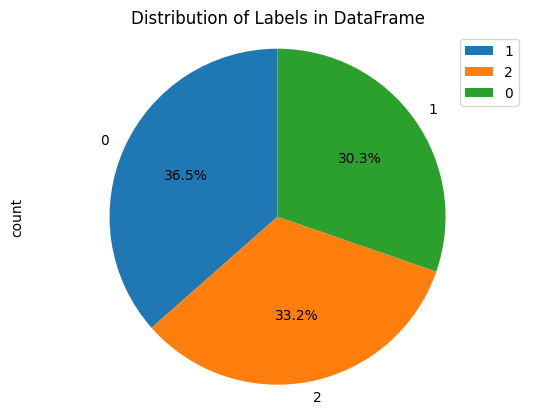

In [38]:
ds['Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(ds['Level'].unique())
plt.show()